In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sc
from scipy.stats import norm

In [65]:
df = pd.read_csv('dataset_1672182.csv')
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,unit_price,product_category,product_type
0,1,06/07/2023,17:56:22,1.0,2.0,Utrecht,4.50,Chocolate,Hot chocolate
1,2,06/10/2023,12:32:57,2.0,2.0,Utrecht,4.25,Coffee,Syrup coffee
2,3,06/05/2023,10:17:06,1.0,1.0,Alkmaar,3.00,Tea,Black tea
3,4,06/06/2023,15:54:08,3.0,1.0,Alkmaar,3.50,Coffee,Milk coffee
4,5,06/09/2023,10:08:03,1.0,3.0,Eindhoven,4.50,Chocolate,Hot chocolate


In [66]:
df.isnull().sum()

transaction_id        0
transaction_date      0
transaction_time      0
transaction_qty     136
store_id             65
store_location        0
unit_price            0
product_category      0
product_type          0
dtype: int64

In [67]:
df = df.dropna()

Question 1:

In [68]:
qty_count = len(df[df['transaction_qty']>2]) 
print("Amount of orders where qty>2:", qty_count)
print("Total amount of orders:", len(df))
qty_probability = qty_count/len(df)*100
print("Propability that orders contains more than 1 item:", qty_probability, "%")

Amount of orders where qty>2: 1429
Total amount of orders: 7157
Propability that orders contains more than 1 item: 19.96646639653486 %


Question 2:

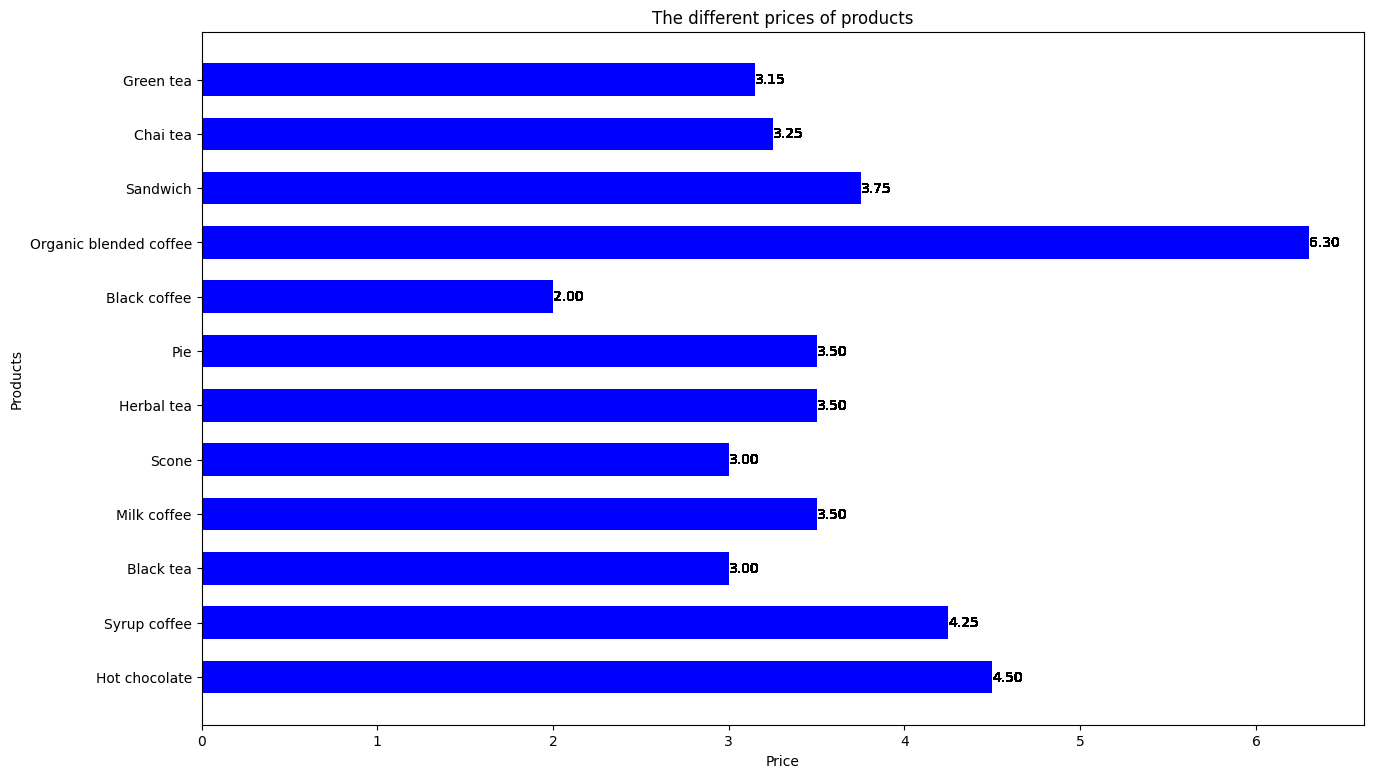

In [69]:
x = df['product_type']
y = df['unit_price']

plt.figure(figsize=(15, 9)) 
plt.bar_label(plt.barh(x, y, height=0.6, color='blue', ), fmt='%.2f')
plt.xlabel('Price')
plt.ylabel('Products')
plt.title('The different prices of products')
plt.show()


In [70]:
mean_unit_price = np.mean(df['unit_price'])
median_unit_price = np.median(df['unit_price'])
print('Mean unit price:', mean_unit_price)
print('Median unit price:', median_unit_price)

Mean unit price: 3.8077476596339244
Median unit price: 3.5


Question 3:

In [71]:
df['transaction_qty'] = pd.to_numeric(df['transaction_qty'])

df.insert(9, "revenue", df['unit_price'] * df['transaction_qty'])
df.head() #added revenue column to check what the total cash coming per transaction is

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,unit_price,product_category,product_type,revenue
0,1,06/07/2023,17:56:22,1.0,2.0,Utrecht,4.50,Chocolate,Hot chocolate,4.5
1,2,06/10/2023,12:32:57,2.0,2.0,Utrecht,4.25,Coffee,Syrup coffee,8.5
2,3,06/05/2023,10:17:06,1.0,1.0,Alkmaar,3.00,Tea,Black tea,3.0
3,4,06/06/2023,15:54:08,3.0,1.0,Alkmaar,3.50,Coffee,Milk coffee,10.5
4,5,06/09/2023,10:08:03,1.0,3.0,Eindhoven,4.50,Chocolate,Hot chocolate,4.5


In [72]:
print("Total amount of transactions:", len(df))
total_money_spent = (df['unit_price']*df["transaction_qty"]).sum()
print("Total amount of money spent:", total_money_spent )
print("Average revenue per transaction:", (total_money_spent/len(df)))

Total amount of transactions: 7157
Total amount of money spent: 54474.2
Average revenue per transaction: 7.611317591169484


In [73]:
unit_price_per_date = df.groupby('transaction_date')["revenue"].sum()

print("The total amount of money spent per day:")
print(unit_price_per_date)


The total amount of money spent per day:
transaction_date
06/05/2023     2687.35
06/06/2023     6301.15
06/07/2023     6312.35
06/08/2023     8586.65
06/09/2023    10192.20
06/10/2023    11253.15
06/11/2023     9141.35
Name: revenue, dtype: float64


In [74]:
amount_of_transactions_per_day = df.groupby(df['transaction_date']).size() 

print(amount_of_transactions_per_day) #amount of transactions per day

transaction_date
06/05/2023     355
06/06/2023     825
06/07/2023     840
06/08/2023    1097
06/09/2023    1345
06/10/2023    1453
06/11/2023    1242
dtype: int64


In [75]:
AV_06_05 = (2709.15/355)
AV_06_06 = (6370.65/825)
AV_06_07 = (6368.10/840)
AV_06_08 = (8656.60/1097)
AV_06_09 = (10306.20/1345)
AV_06_10 = (11345.95/1453)
AV_06_11 = (9181.35/1242)
#i couldnt use the code from my previous part because it would also take the date wich resulted in a String error

print("Average value per transaction 06/05:", AV_06_05)
print("Average value per transaction 06/06:", AV_06_06)
print("Average value per transaction 06/07:", AV_06_07)
print("Average value per transaction 06/08:", AV_06_08)
print("Average value per transaction 06/09:", AV_06_09)
print("Average value per transaction 06/10:", AV_06_10)
print("Average value per transaction 06/11:", AV_06_11)

Average value per transaction 06/05: 7.6314084507042255
Average value per transaction 06/06: 7.7219999999999995
Average value per transaction 06/07: 7.581071428571429
Average value per transaction 06/08: 7.891157702825889
Average value per transaction 06/09: 7.662602230483272
Average value per transaction 06/10: 7.808637302133517
Average value per transaction 06/11: 7.392391304347826


In [76]:
#sample mean
Sample_mean_assignment3 = (AV_06_05 + AV_06_06 + AV_06_07 + AV_06_08 + AV_06_09 + AV_06_10 + AV_06_11) / 7
print("Sample mean:", Sample_mean_assignment3)
Average_value_pdays = AV_06_05, AV_06_06, AV_06_07, AV_06_08, AV_06_09, AV_06_10, AV_06_11

Stdrd_deviation_assignment3 = np.std(Average_value_pdays, ddof=0)
print("Standard deviation:", Stdrd_deviation_assignment3)

Sample mean: 7.669895488438023
Standard deviation: 0.14993039718116674


In [77]:
cl = 0.95
dg_f = len(df['revenue']) - 1

confidence_interval_test = sc.t.interval(cl, dg_f, Sample_mean_assignment3, Stdrd_deviation_assignment3 / np.sqrt(len(df['revenue'])))
print('95% Confidence interval:', confidence_interval_test)

95% Confidence interval: (7.666421361070426, 7.67336961580562)


4A2 

In [78]:
grpd_product_rv = unit_price_per_date = df.groupby('product_type')["revenue"].sum()
print(grpd_product_rv)

product_type
Black coffee               1784.00
Black tea                  2529.00
Chai tea                   2726.75
Green tea                  2806.65
Herbal tea                 3031.00
Hot chocolate             16254.00
Milk coffee                3230.50
Organic blended coffee     5991.30
Pie                        4354.00
Sandwich                   4185.00
Scone                      3621.00
Syrup coffee               3961.00
Name: revenue, dtype: float64


In [79]:
print('Total_money_spent', total_money_spent)
print('Mean revenue per product:', total_money_spent/13)

Total_money_spent 54474.2
Mean revenue per product: 4190.323076923077


In [80]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,unit_price,product_category,product_type,revenue
0,1,06/07/2023,17:56:22,1.0,2.0,Utrecht,4.50,Chocolate,Hot chocolate,4.5
1,2,06/10/2023,12:32:57,2.0,2.0,Utrecht,4.25,Coffee,Syrup coffee,8.5
2,3,06/05/2023,10:17:06,1.0,1.0,Alkmaar,3.00,Tea,Black tea,3.0
3,4,06/06/2023,15:54:08,3.0,1.0,Alkmaar,3.50,Coffee,Milk coffee,10.5
4,5,06/09/2023,10:08:03,1.0,3.0,Eindhoven,4.50,Chocolate,Hot chocolate,4.5


In [81]:
products_sold = df['transaction_qty'].sum()
print("Sample size:", products_sold)
price_mean = np.mean(df['unit_price'])
print('Mean price:', price_mean)
unique_prices = df['unit_price'].unique()
Stdrd_deviation_4A2 = np.std(unique_prices, ddof=0)
print('Standard deviation:', Stdrd_deviation_4A2)

Sample size: 14316.0
Mean price: 3.8077476596339244
Standard deviation: 1.1358903616019667


In [82]:
cl_4A2 = 0.95
ln4A2 = len(df['unit_price']) - 1

cit_4A2 = sc.t.interval(cl_4A2, ln4A2, price_mean, Stdrd_deviation_4A2 / np.sqrt(len(df['unit_price'])))
print('95% Confidence interval:', cit_4A2)

95% Confidence interval: (3.781427261195557, 3.8340680580722917)


In [83]:
test_4A2 = 1-norm(loc = 0, scale = Stdrd_deviation_4A2).cdf(4190.32)
print(test_4A2)
#because the result is so small there is evidence there is a product that is 4190.32 more expensive than the other products. So the hypothesis was correct.

0.0


Because our result is <0.05 the hypothesis is true.

5E1:

In [84]:
unit_price_per_date = df.groupby('transaction_date')["revenue"].sum()

print("The total amount of money spent per day:")
print(unit_price_per_date)

#A descriptive analysis to see the amount of money spent per day.

The total amount of money spent per day:
transaction_date
06/05/2023     2687.35
06/06/2023     6301.15
06/07/2023     6312.35
06/08/2023     8586.65
06/09/2023    10192.20
06/10/2023    11253.15
06/11/2023     9141.35
Name: revenue, dtype: float64


In [85]:
amount_of_transactions_per_day = df.groupby(df['transaction_date']).size() 

print(amount_of_transactions_per_day) #amount of transactions per day

transaction_date
06/05/2023     355
06/06/2023     825
06/07/2023     840
06/08/2023    1097
06/09/2023    1345
06/10/2023    1453
06/11/2023    1242
dtype: int64


Comparing the lowest day of money coming in to the highest day. 11253.15 - 2687.35 = 8565.80 revenue less, wich is 8565.80/3.8077476596339244 = ~2.250 less orders coming in.


In [86]:
print("Sample size:", len(df))
revenue_mean = np.mean(df['revenue'])
print('Mean revenue:', revenue_mean)
unqiue_revenue = df['revenue'].unique()
Stdrd_deviation_5E1 = np.std(unqiue_revenue, ddof=0)
print('Standard deviation:', Stdrd_deviation_5E1)

Sample size: 7157
Mean revenue: 7.611317591169484
Standard deviation: 8.165458414021291


In [87]:
cl_5E1 = 0.95
ln5E1 = len(df['revenue']) - 1 #using sc.t.interval because n>30 and sigma is known

cit_5E1 = sc.t.interval(cl_5E1, ln5E1, revenue_mean, Stdrd_deviation_5E1 / np.sqrt(len(df['revenue'])))
print('95% Confidence interval:', cit_5E1)

95% Confidence interval: (7.422110845382985, 7.8005243369559825)


In [88]:
1-norm(loc = 0, scale = Stdrd_deviation_5E1).cdf(2250)

0.0

Because the P-value is smaller than 0.05 the result is statistically significant, meaning the hypothesis is right.

Advice: 
Because our hypothesis was right and the descriptive analysis tells us that there was an issu. TTR should look into advertising or special deals to attract customers even on the days the revenue is usually the lowest.

In [89]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,unit_price,product_category,product_type,revenue
0,1,06/07/2023,17:56:22,1.0,2.0,Utrecht,4.50,Chocolate,Hot chocolate,4.5
1,2,06/10/2023,12:32:57,2.0,2.0,Utrecht,4.25,Coffee,Syrup coffee,8.5
2,3,06/05/2023,10:17:06,1.0,1.0,Alkmaar,3.00,Tea,Black tea,3.0
3,4,06/06/2023,15:54:08,3.0,1.0,Alkmaar,3.50,Coffee,Milk coffee,10.5
4,5,06/09/2023,10:08:03,1.0,3.0,Eindhoven,4.50,Chocolate,Hot chocolate,4.5


6C1

In [90]:
revenue_per_location = df.groupby('store_location')["revenue"].sum()
print(revenue_per_location)

#A descriptive analysis to see the revenue per store.

store_location
Alkmaar      17174.3
Eindhoven    13618.5
Utrecht      23681.4
Name: revenue, dtype: float64


Based on the descreptive analysis to see the revenue per store, we can conclude that Utrecht is our best selling store and Eindhoven our worst. My inferitive analyis is that the stores normally dont deviate more than 18158.06 - 13618,50 = 4.539,56 from eachother

My inferitive analyis is that this was a 'one off' case and the stores normally do have comparable revenues.
Hypothesis: The stores normally dont deviate more than 18158.06 - 13618,50 = 4.539,56 from eachother
0-hypothesis: The stores always have large gaps in revenue

In [91]:
print("Sample size:", len(df))
revenue_store_mean = ((17174.3 + 13618.5 + 23681.4) / 3)
print('Mean revenue:', revenue_store_mean)
unqiue_stores = 3
Stdrd_deviation_6C1 = np.std(unqiue_stores, ddof=0)
print('Standard deviation:', Stdrd_deviation_6C1)

Sample size: 7157
Mean revenue: 18158.066666666666
Standard deviation: 0.0


In [92]:
1-norm(loc = 0, scale = Stdrd_deviation_6C1).cdf(4539.56) #I dont know why i got a nan value from this.

/home/codespace/.local/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2069: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


nan